In [6]:
from termcolor import colored
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
import ipywidgets
import re

import datapurifier as dp
from datapurifier import Mleda
from datapurifier import Nlpeda
from datapurifier import Nlpurifier

%matplotlib inline
# sns.set_theme(style="darkgrid")
print(dp.__version__)

0.2.3


In [7]:
dp.get_dataset_names()

['boston_housing',
 'breast_cancer',
 'diabetes',
 'iris',
 'pima_indians_diabetes',
 'sample_superstore',
 'tips',
 'titanic',
 'us_arrests',
 'womens_clothing_e_commerce_reviews',
 'zoo']

In [8]:
dp.get_text_dataset_names()

['womens_clothing_e-commerce_reviews']

In [9]:
df = dp.load_dataset("womens_clothing_e_commerce_reviews")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [2]:
data = { "examples": ["ALL UPPERCASE LETTERS","hi, i'd be happy with u", "hi my email is email@email.com",
                     "hi my website is https://google.com", "@special #characters with punctuations! ?",
                     "having   multiple   spaces", "<html>text under html tag</html>", "Áccěntěd těxt",
                     "I have many stop words, so try and remove me", "base form example: run ran running runs",
                      "1234567890 is my number", "paris101 is the best", "game is on 🔥🔥", "Hilarious😂", "Hello :-)" ]} 

## Dataset with null values
# data = { "examples": ["ALL UPPERCASE LETTERS","hi, i'd be happy with u", "hi my email is email@email.com",
#                      "hi my website is https://google.com", "@special #characters with punctuations! ?",
#                      "having   multiple   spaces", "<html>text under html tag</html>", "Áccěntěd těxt",
#                      "I have many stop words, so try and remove me", "base form example: run ran running runs",
#                       np.nan, "1234567890 is my number", "paris101 is the best", "game is on 🔥🔥", "Hilarious😂", "Hello :-)" ]} 

df = pd.DataFrame(data, columns = ["examples"])
df

,examples
0,ALL UPPERCASE LETTERS
1,"hi, i'd be happy with u"
2,hi my email is email@email.com
3,hi my website is https://google.com
4,@special #characters with punctuations! ?
5,having multiple spaces
6,<html>text under html tag</html>
7,Áccěntěd těxt
8,"I have many stop words, so try and remove me"
9,base form example: run ran running runs


In [6]:
pure = Nlpurifier(nlp_df, "tweets")

GridspecLayout(children=(Checkbox(value=False, description='Drop Null Rows', indent=False, layout=Layout(grid_…


Convert Word to its Base Form


interactive(children=(RadioButtons(description='Technique:', options=('None', 'Stemming', 'Lemmatization'), va…

Remove Top Common Words


interactive(children=(Checkbox(value=False, description='Remove Top Common Words'), Output()), _dom_classes=('…

Remove Top Rare Words


interactive(children=(Checkbox(value=False, description='Remove Top Rare Words'), Output()), _dom_classes=('wi…

Button(description='Start Purifying', style=ButtonStyle())

In [4]:
# pure = Nlpurifier(df, "examples")

GridspecLayout(children=(Checkbox(value=False, description='Drop Null Rows', indent=False, layout=Layout(grid_…


Convert Word to its Base Form


interactive(children=(RadioButtons(description='Technique:', options=('None', 'Stemming', 'Lemmatization'), va…

Remove Top Common Words


interactive(children=(Checkbox(value=False, description='Remove Top Common Words'), Output()), _dom_classes=('…

Remove Top Rare Words


interactive(children=(Checkbox(value=False, description='Remove Top Rare Words'), Output()), _dom_classes=('wi…

Button(description='Start Purifying', style=ButtonStyle())

In [7]:
# pure.word_count_series

In [10]:
# pure.df

In [11]:
pure_df = pure.df
pure_df["original_examples"] = df["examples"]
cols = pure_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
pure_df = pure_df[cols]
pure_df

,original_examples,examples
0,ALL UPPERCASE LETTERS,ALL UPPERCASE LETTERS
1,"hi, i'd be happy with u","hi, i'd be happy with u"
2,hi my email is email@email.com,hi my email is email@email.com
3,hi my website is https://google.com,hi my website is httpsSkeptical_annoyed_undeci...
4,@special #characters with punctuations! ?,@special #characters with punctuations! ?
5,having multiple spaces,having multiple spaces
6,<html>text under html tag</html>,<html>text under html tag</html>
7,Áccěntěd těxt,Áccěntěd těxt
8,"I have many stop words, so try and remove me","I have many stop words, so try and remove me"
9,base form example: run ran running runs,base form example: run ran running runs


In [ ]:
df

In [ ]:
pure.df

## Nlp EDA Testing

In [5]:
# nlp_df = pd.read_csv("inputs/twitter16m.csv", header=None, encoding='latin-1')
# nlp_df = nlp_df[[5,0]] # selecting only the tweets column and the sentiment
# nlp_df.columns = ["tweets","sentiment"]
# nlp_df.head()

nlp_df = dp.load_dataset("womens_clothing_e-commerce_reviews")
nlp_df = nlp_df[["Review Text", "Positive Feedback Count"]]
nlp_df.columns = ["review", "rating"]
nlp_df.head()

,tweets,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [8]:
nlp_df.isnull().sum()

review    845
rating      0
dtype: int64

In [9]:
# eda = Nlpeda(nlp_df, "tweets", analyse="basic")

# eda = Nlpeda(nlp_df, "review", analyse="basic")
eda = Nlpeda(nlp_df, "review", analyse="word")

Dataframe contains 23486 rows and 2 columns


Null Information of Dataframe: 


,column_name,null_rows,null_percentage
0,review,845,3.597888


Please select to 'drop all null rows', to continue analysis of data.


interactive(children=(Checkbox(value=False, description='Drop all null rows'), Output()), _dom_classes=('widge…

In [10]:
eda.trigram_df

AttributeError: 'Nlpeda' object has no attribute 'trigram_df'

## Test on real dataset

In [ ]:
store_df = dp.load_dataset("womens_clothing_e-commerce_reviews")
store_df = store_df[["Review Text", "Positive Feedback Count"]]
store_df.columns = ["review", "rating"]
store_df.head()

In [ ]:
store_df.shape

In [ ]:
store_df["review"].isin([' ', 'NULL', np.nan]).sum()

In [ ]:
store_df.dropna(inplace=True)
store_df.reset_index(drop=True, inplace=True)
store_df["review"].isin([' ', 'NULL', np.nan]).sum()

In [ ]:
store_df.shape

In [ ]:
store_df.iloc[90:100,:]

In [ ]:
store_df.reset_index[90:]

In [ ]:
sns.get_dataset_names()

In [3]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Checking termcolor

# print(colored("Hello World", "green"))
# print(colored("Hello World", "red"))
# print(colored("Hello World", "red",attrs=['bold']))
# print(colored("Hello World", "blue"))

In [10]:
# df = pd.read_csv("./datasets/SampleSuperstore.csv")
df = pd.read_csv("./datasets/iris.csv")
# df = pd.read_csv("./datasets/Bengaluru_House_Data.csv")

Shape of DataFrame:  (150, 5)

Sample of Dataframe:


,sepal_length,sepal_width,petal_length,petal_width,species
5,5.4,3.9,1.7,0.4,setosa
63,6.1,2.9,4.7,1.4,versicolor
129,7.2,3.0,5.8,1.6,virginica
138,6.0,3.0,4.8,1.8,virginica
73,6.1,2.8,4.7,1.2,versicolor
107,7.3,2.9,6.3,1.8,virginica
33,5.5,4.2,1.4,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
128,6.4,2.8,5.6,2.1,virginica
38,4.4,3.0,1.3,0.2,setosa



There are total 1 categorical and 4 numerical columns

Description of Data:



,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Information regarding data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None


Congrats!!, The Dataframe has NO NULL VALUES


Interactive Value Count Plot:



Output()


Joint Plot:



Output()


Correlation Heatmap Plot:



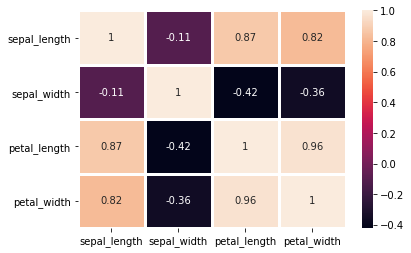

Pair Plot:



Output()


Pie Plot:



interactive(children=(Dropdown(description='Columns:', options=('species',), value='species'), Output()), _dom…

In [11]:
mleda = Mleda(df)
mleda

In [ ]:
# help(aa)
# print(MLeda.__doc__)
# print(help(MLeda))
# print(dir(MLeda))


In [ ]:
mleda.cat_cols

In [ ]:
mleda.num_cols

In [ ]:
# ae.sample(df)

In [ ]:
# For value count
# n = 10
# for col in df.columns:
#     print(df[col].value_counts().index.tolist()[:n])

## Widget Testing

In [ ]:
# Value Count Plot

# columns = df.columns
# column_dropdown = ipywidgets.Dropdown(options=columns,
#                                 value=columns[0],
#                                 description='Columns:',
#                                 disabled=False)

# top_columns = widgets.IntSlider(
#     value=5,
#     min=1,
#     max=35,
#     step=1,
#     description='Top Columns:',
#     disabled=False,
#     continuous_update=True,
#     orientation='horizontal',
#     readout=True,
#     readout_format='d'
# )

# items = [column_dropdown, top_columns]
# value_count_ui = widgets.HBox(items)

# def value_counts_plot(column, n):
#     plt.figure(figsize=(10,5))
#     sns.barplot(x = df[column].value_counts().index.tolist()[:n], y = df[column].value_counts().tolist()[:n])
#     plt.xticks(rotation=75)
#     plt.ylabel("count")
#     plt.xlabel(column)
#     print("\nTop Columns with most common values are: ")
#     print(df[column].value_counts().index.tolist()[:n])

# out = widgets.interactive_output(value_counts_plot, {'column': column_dropdown, 'n': top_columns})

# display(value_count_ui, out)


In [ ]:
# Pie Plot
# cat_col = df.select_dtypes(include="O").columns.tolist()

# cat_column_dropdown = ipywidgets.Dropdown(options=cat_col,
#                                 value=cat_col[0],
#                                 description='Columns:',
#                                 disabled=False)
# def pie_plot(column):
#     plt.figure(figsize=(10,5))
#     df[column].value_counts().plot.pie(
#             autopct="%1.1f%%")

# ipywidgets.interact(pie_plot, column=cat_column_dropdown);

In [ ]:
# sns.pairplot(df, hue="Species")

In [ ]:
## Jointplot

# col = df.columns
# column_dropdown1 = ipywidgets.Dropdown(options=col,
#                                 value=col[0],
#                                 description='Columns:',
#                                 disabled=False)

# column_dropdown2 = ipywidgets.Dropdown(options=col,
#                                 value=col[0],
#                                 description='Columns:',
#                                 disabled=False)

# kind =  ["scatter","kde","hist","hex","reg","resid"]

# kind_dropdown = ipywidgets.Dropdown(options=kind,
#                                 value=kind[0],
#                                 description='Kind:',
#                                 disabled=False)

# items = [column_dropdown1, column_dropdown2, kind_dropdown]
# joint_plot_ui = widgets.HBox(items)

# def plot_joinplot(x,y,kind):
#     sns.jointplot(x=x, y=y,kind=kind, data=df)

# output = widgets.interactive_output(plot_joinplot, {'x': column_dropdown1, 'y': column_dropdown2, 'kind':kind_dropdown})

# display(joint_plot_ui, output)

In [ ]:
## Distribution plot
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_col = df.select_dtypes(include=numerics).columns

plt.figure(figsize=(16,14))
for i, col in enumerate(num_col,1):
    plt.subplot(3,3,i)
    sns.distplot(df[col], norm_hist= False)